In [2]:
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background

# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# turn off warnings
import warnings
warnings.filterwarnings('ignore')



**Principal Component Analysis (PCA)**

An *Unsupervised Statistical Learning Technique* used to examine the interrelations among a set of variables.


- Where Regression Analysis determines the best line of a data fit, Factor Analysis determines several orthogonal lines of best fit to a data set.
- Orthogonal means 'at right angles'
1. actually the lines are perpendicular to each other in N-dimensional space
- n-Dimensional space is the variable sample space
1. There are as many dimensions as there are variables. 

**In a dataset with 4 variables the sample space is 4-Dimensional**

Example of an orthogonal fit to a best fit:

![Orthogonal fit to line of best fit](https://4.bp.blogspot.com/-urn6_TX82iE/VGetWlAH-aI/AAAAAAAACns/CFNvruaOb4A/s1600/Capture.GIF)

**Components**
- Components are a linear transformation that chooses a variable system for the data set such that the greatest variance of the dataset comes to lie on the first axes
- then the Second Greatest variance on the second axes
- and so on
- The process allows us to reduce the number of variables used in an analysis

- The components are uncorrelated, since in the sample space they are orthogonal (at direct right angles) to each other

We can continue this analysis into higher dimensions

Component 1 explains most of the variance. Component 2 explaining the next largest chunk, Component 3 the next largest chunk, etc


*If we use this technique on a dataset with a large number of variables, we can compress the amount of explained variation down to a few components*. Then we want to get rid of the components that don't explain much of the variance of the data.


The most challenging part of PCA is interpreting the components.


Typically with PCA you want to *Standardize* the data.

This is only used for Analysis of data and is not a fully deployable model



In [3]:
# Import the Cancer dataset
from sklearn.datasets import load_breast_cancer

In [4]:
# load the data
cancer = load_breast_cancer()

In [5]:
# "Bunch" essentially acts like a dictionary
type(cancer)

sklearn.utils.Bunch

In [8]:
# Get keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
# get description with DESCR. The data is kept in data and features in feature_names
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**A small number of instances (569) but a relatively large number of attributes (30)**


#### Breast cancer wisconsin (diagnostic) dataset:
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class


If we were trying to classify the data, we'd want to try to predict if they are malignant or benign. 

*In this case we want to find **what components are the Most Important** (Cause the most variance) in the dataset*

If you're trying to perform Classification on a dataset, it makes sense to run PCA to get a sense of what's most Important.


In [13]:
# set up the dataframe
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

It's difficult to visualize High Dimensional Data. With PCA we'll find the First Two Principal Components.



In [22]:
# import the model
from sklearn.preprocessing import StandardScaler

**Scale the data so that it has a single unit variance before we apply the PCA**

What we're doing 
- instantiate the PCA object
- find the principal components using the fit method
- apply the rotation and dimensionality reduction by calling transform

In [25]:
# Instantiate the Scaler object
scaler = StandardScaler()

In [26]:
# Fit the dataframe
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
# Now transform the data
scaled_data = scaler.transform(df)

We can also specify how many components we want to keep using the PCA object

### Performing the PCA

In [28]:
# import PCA
from sklearn.decomposition import PCA

In [29]:
# Only use the top 2 components to start
pca = PCA(n_components=2)

In [30]:
# Fit the pca to the scaled data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
# Transform the data to the first principal components
x_pca = pca.transform(scaled_data)

In [33]:
# The original data shape is 569, 30
scaled_data.shape

(569, 30)

In [35]:
# The new data shape is 569, 2 (no, rows by n_components)
x_pca.shape

(569, 2)

The data is not easy to make sense of, but it's still a powerful technique for driving down complexity.

Using c, cmap and alpha see how the difference between malignant or benign stands out. We're able to make more sense of of the data with 2 columns, rather than digging through 30 columns

Text(0, 0.5, 'Second Principal Component')

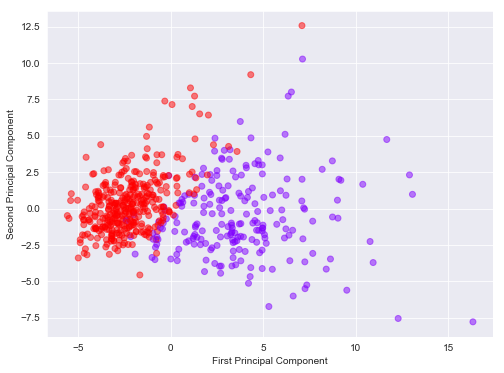

In [45]:
# Plot these out
# Take all the rows from column 0 and plot those against all the rows in column 1    
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow',alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

The components correspond to *Combinations* of the original features. The components themselves are stored as *Attributes of the PCA object*

Each Row corresponds to the Component and each Column maps back to the original Features

In [46]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

 Example this relationship with a heatmap
 

In [48]:
# create a dataframe with both the components and the original feature names
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [49]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


**Each row is a Component and each Column is a Feature. The higher the number (hotter or brighter the color), the more correlated it is.**

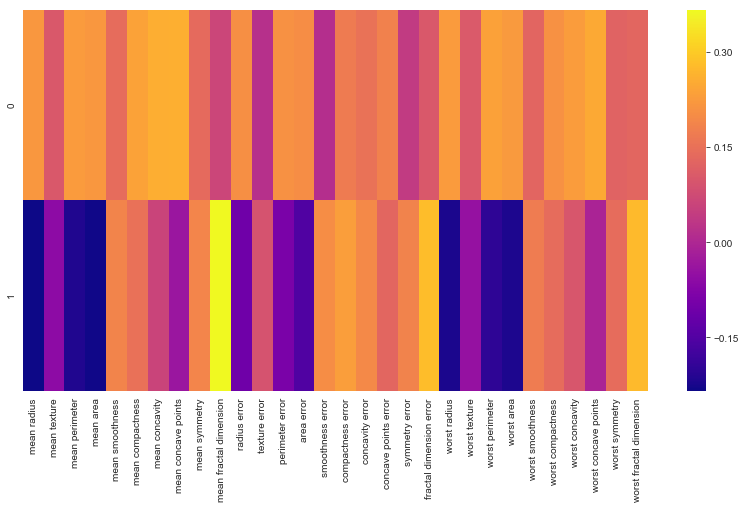

In [55]:
plt.figure(figsize=(14,7))
sns.heatmap(df_comp,cmap='plasma')

**Using this in real life** 

if your next step is a Logistic Regression your next step can be performed on x_pca sized data rather than on the full pca data. 